# Analysis of Ford GoBike System in 2019
## by Hashim Hashim





## Investigation Overview


In this analysis, I wanted to look at features of Ford GoBike System about the trips of type of user according to hours and days. The main focus was on duration in minutes, days and hours.
 


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
go_bike=pd.read_csv('201902-fordgobike-tripdata.csv')
go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
go_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#remove unwanted columns and the null values
go_bike.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1,inplace=True)

In [6]:
#drop nan values
go_bike.dropna(inplace=True)

In [7]:
#correcting datatypes using dictionary and astype
data_types_dict={'start_time':'datetime64',
                'end_time': 'datetime64',
                'start_station_id':'object',
                'end_station_id':'object',
                'bike_id':'object',
                'user_type':'category',
                'bike_share_for_all_trip':'category'}
go_bike = go_bike.astype(data_types_dict)

In [8]:
go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(2), 

## Distribution of Duration in minutes

The duration in minutes follows closely a normal distribution which shows that average trips took about 10 minutes


In [9]:
#create a minute column
go_bike['duration_min'] = go_bike['duration_sec']/60
go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,29.883333


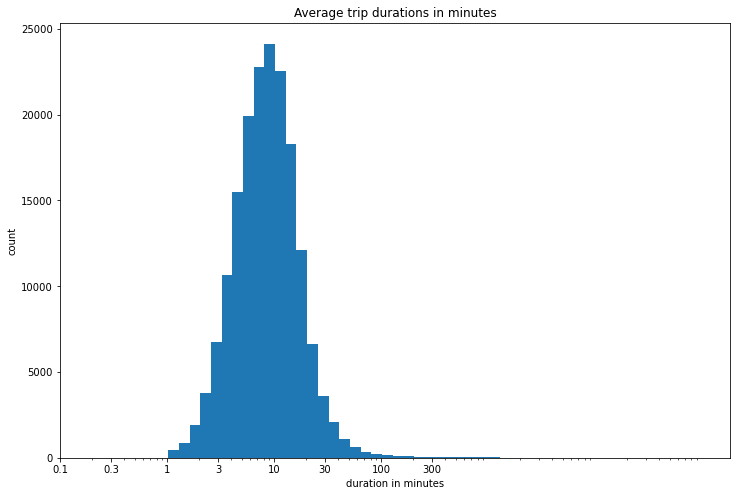

In [10]:
plt.figure(figsize=(12,8))
#get the ticks for bins 
bins = 10 ** np.arange(0.01, 5+0.1, 0.1)

#generate the x-ticks 
ticks = [0.1,0.3,1,3,10,30,100,300]
#convert ticks to string values
labels = ['{}'.format(v) for v in ticks]

#plot histogram
plt.hist(data=go_bike, x='duration_min', bins=bins);

plt.xscale('log')
plt.title('Average trip durations in minutes')
plt.ylabel('count')
plt.xlabel('duration in minutes')
#apply x-ticks
plt.xticks(ticks,labels);

## Distribution of user type
Subscribers have the highest number of trips during the days, took shorter time renting the bikes during the weekdays, while customers took longer time cycling and their trips were inclined more towards the weekend.


In [11]:
#get the day names of the dateTime index
go_bike['day_of_week']=go_bike['start_time'].dt.day_name()
#convert day of week column to category
order_var = pd.api.types.CategoricalDtype(ordered=True,categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
go_bike['day_of_week'] = go_bike['day_of_week'].astype(order_var)

In [12]:
#list of days in order
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

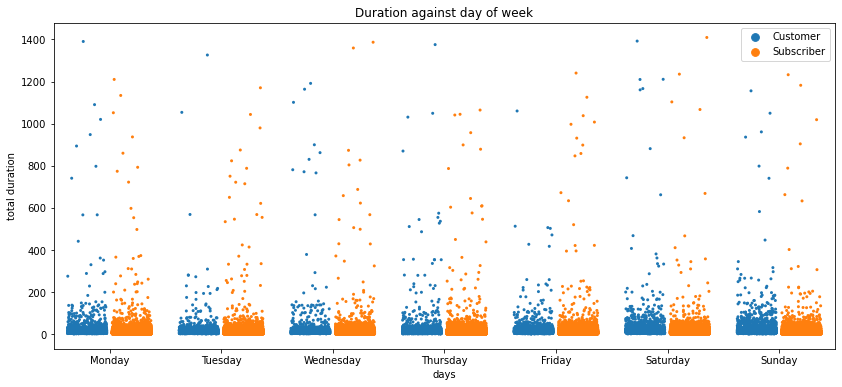

In [13]:
#set plot dimensions
plt.figure(figsize=[14,6])
#plotting all three duration, days and type of user
g=sb.stripplot(data=go_bike, x='day_of_week', y='duration_min', hue= 'user_type', order=day_order, size=3,
              jitter=0.35, dodge=True)
plt.title('Duration against day of week')
plt.ylabel('total duration')
plt.xlabel('days')
plt.legend();

## Distribution on gender members
According to the data, males took more trips which are longer than female. This shows that female gender may have lesser interest in riding and sharing bikes at the Francisco bay area.



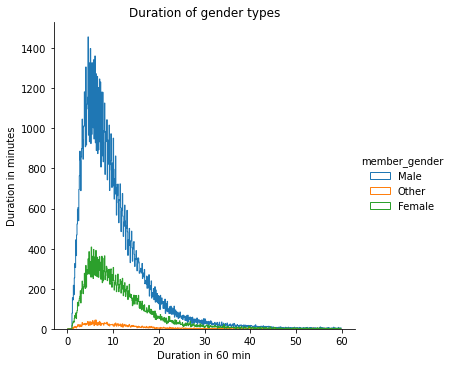

In [14]:
#a line plot for types of gender durations
bin_edges = np.arange(0, 60,0.1)
g = sb.FacetGrid(data = go_bike, hue = 'member_gender', height = 5)
g.map(plt.hist, "duration_min", bins = bin_edges, histtype = 'step')
plt.title('Duration of gender types')
plt.ylabel('Duration in minutes')
plt.xlabel('Duration in 60 min')
g.add_legend();

In [16]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 406899 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Haashim\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Haashim\Anaconda3\lib\site-packages\jupyter_core\application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Haashim\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Haashim\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "C:\Users\Haashim\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Use